BTP-II


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

df = pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# handling the categorical data using one hot encoding
categorical=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
numerical=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoder.fit(df[categorical])
encoded_cols = list(encoder.get_feature_names_out(categorical))
print(encoded_cols)
df[encoded_cols] = encoder.transform(df[categorical])

['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# saparating the dependent and independent variables
X = df[numerical+encoded_cols]
X.drop("HeartDisease", axis=1, inplace=True)

y = df["HeartDisease"]

<ipython-input-8-c0e54658ad78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("HeartDisease", axis=1, inplace=True)


In [9]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
y.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
# handling class imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [12]:
max_v = [max(X[i]) for i in X.columns]

In [13]:

# converting all values in 0 to 1
X = X / max_v

In [14]:
y.value_counts()

HeartDisease
0    508
1    508
Name: count, dtype: int64

In [15]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.519481,0.700,0.479270,0.0,0.851485,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000
1,0.636364,0.800,0.298507,0.0,0.772277,0.161290,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
2,0.480519,0.650,0.469320,0.0,0.485149,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000
3,0.623377,0.690,0.354892,0.0,0.534653,0.241935,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000
4,0.701299,0.750,0.323383,0.0,0.603960,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.675325,0.700,0.510779,0.0,0.693069,0.108184,1.000000,0.000000,0.000000,0.552839,0.447161,0.0,0.447161,0.000000,0.552839,1.000000,0.000000,0.0,0.000000,1.000000
1012,0.701299,0.655,0.655058,0.0,0.747525,0.000000,0.940026,0.059974,0.059974,0.940026,0.000000,0.0,0.940026,0.059974,0.000000,1.000000,0.000000,0.0,0.000000,1.000000
1013,0.454545,0.605,0.320066,0.0,0.851485,0.020721,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.871533,0.128467,0.0,0.128467,0.871533
1014,0.766234,0.585,0.000000,0.0,0.618812,-0.061935,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.290012,0.709988,1.000000,0.000000,0.0,0.000000,1.000000


In [16]:
# Perform the Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=99)

In [17]:
X_train.shape

(812, 20)

In [18]:

X_train.shape[1]

20

In [19]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.8 MB/s eta 0:00:00


In [20]:
def generate_random_weights(no_of_feature): #Generates an array of random numbers whose sum is approximately equal to 1.

    random_values = np.random.uniform(0, 1, no_of_feature)
    normalized_values = random_values / sum(random_values)
    return normalized_values

In [21]:
import tensorflow as tf
# tf.compat.v1.enable_v2_behavior()
from tensorflow import keras

In [22]:
from sklearn.metrics import f1_score

In [134]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1, input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# model = RandomForestClassifier(max_depth=2, random_state=0)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 20)                41        
 tion)                                                           
                                                                 
 dense_45 (Dense)            (None, 50)                1050      
                                                                 
 dense_46 (Dense)            (None, 32)                1632      
                                                                 
 dense_47 (Dense)            (None, 16)                528       
                                                                 
 dense_48 (Dense)            (None, 8)                 136       
                                                                 
 dense_49 (Dense)            (None, 4)                 36        
                                                      

In [135]:
# this function takes population(or weights w(j,k) ) as input and gives the corresponding fitness of population (in our case fitness if f1 score ) we simply multiply the
# instances with weights and then fed it in the model
# notice one parameter called "test" which is "are we calling this function during testing time?" its default value is false and during test time its values is true
# so the compile and fit parts are skipped during testing
def cal_fitness(population,X=X_train,y=y_train,test=False):
  if len(X.columns) != len(population):
    raise ValueError("Length of population array must match the number of columns in X_train")
# Multiply each column of X_train with the corresponding index of population
  weighted_X_train = X* population

  if(not test):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(weighted_X_train, y, epochs = 10)
  # Predict on the training data
  y_pred = model.predict(weighted_X_train)

  y_pred_binary = (y_pred > 0.5).astype(int)
  # print(y_pred_binary)

  # Calculate the F1 score
  f1 = f1_score(y, y_pred_binary)

  return f1


In [136]:
# this function is same as above the only difference is that it gives output of model rather than f1 score
def cal_fitness_output(population,X=X_train,y=y_train,test=False):
  if len(X.columns) != len(population):
    raise ValueError("Length of population array must match the number of columns in X_train")
# Multiply each column of X_train with the corresponding index of population
  weighted_X_train = X* population
  if(not test):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(weighted_X_train, y, epochs = 20)
  # Predict on the training data
  y_pred = model.predict(weighted_X_train)

  #y_pred_binary = (y_pred > 0.5).astype(int)
  # print(y_pred_binary)

  # Calculate the F1 score
  #f1 = f1_score(y_train, y_pred_binary)

  return y_pred

In [137]:
# this function select elite population from the population it rejects 50% of population on the basis of fitness value
def select_elite_pop(population,X=X_train,y=y_train,test=False,fraction=0.5):
  population_fitness=[cal_fitness(x,X,y,test) for x in population]
  sorted_population_indices = np.argsort(population_fitness)[::-1]
  elite_population_indices = sorted_population_indices[:int(fraction * len(population))]
  elite_population = [population[i] for i in elite_population_indices]
  return elite_population

In [138]:

def heuristic_crossover(parent1, parent2):
    '''
    Heuristic crossover generates offspring using fitness values and parent chromosomes.

    '''
    beta = np.random.rand()
    best_parent = parent1 if cal_fitness(parent1) > cal_fitness(parent2) else parent2
    worst_parent = parent1 if cal_fitness(parent1) <= cal_fitness(parent2) else parent2

    offspring_a = best_parent + beta * (best_parent - worst_parent)
    offspring_b = best_parent

    return offspring_a, offspring_b

In [139]:
def Arithmetic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off spring A = α ∗ Parent1 + (1 −α) ∗ Parent2
            Off spring B = (1 −α) ∗ Parent1 + α ∗ Parent2
            Where α is a random number between 0 and 1.
    '''
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1-alpha) * parent2
    child2 = (1-alpha) * parent1 + alpha * parent2

    child1 /= np.sum(child1)
    child2 /= np.sum(child2)

    return child1,child2

In [140]:
def mutate(parent_chromosome): # Randomly swaps elements within a chromosome(or weights) to generate an offspring.

    child = parent_chromosome.copy()

    indices = np.random.choice(range(len(parent_chromosome)), 2, replace=False)
    child[indices[0]], child[indices[1]] = child[indices[1]], child[indices[0]]

    return child

In [141]:
def generate_new_pop(population_size, elite_population, crossover_function=Arithmetic_crossover):
    #Generates a new population by utilizing mutation and crossover operations on the elite population.


    new_population = []
    elite_indices = range(len(elite_population))

    while len(new_population) < population_size:
        # here we define a mutation population to be 0.6 intially and after gaining certain population we reduce it to 0.1
        mutate_crossover_prob = 0.6 if len(new_population) <= 2 * population_size / 3 else 0.1

        # we generate random no and do mutation with probability p
        selected_operation = np.random.choice([0, 1], p=[1 - mutate_crossover_prob, mutate_crossover_prob])

        if selected_operation:
            index = np.random.choice(elite_indices)
            new_population.append(mutate(elite_population[index]))
        else:      # if not mutation we do crossover
            index_1, index_2 = np.random.choice(elite_indices, 2)     # randomly generate 2 indexes for crossover
            child_1, child_2 = crossover_function(elite_population[index_1], elite_population[index_2])

            # Check for negative gene values in child_1
            if any(gene < 0 for gene in child_1):
                index_1, index_2 = np.random.choice(elite_indices, 2)
                child_1, child_2 = crossover_function(elite_population[index_1], elite_population[index_2])

            new_population.extend([child_1, child_2])

    return new_population

In [45]:
from tqdm import tqdm

In [142]:
#20,8
# initialzing the population size by 20 (meaning there will be 20 sets of weights)
population_size=20
no_of_samples=X_train.shape[1]
# generation random weights for each set such that sum in a set is 1
population=np.array([generate_random_weights(no_of_samples) for _ in range(population_size)])   #pop size will be population_size*no_of_samples
# defining how many generation we want
no_of_generation=10
# avg_fitness will contain prediction values for each generation within each generation it will take avg of prediciton of population in a generation
avg_fitness=[]
all_fitness=[]
for i in tqdm(range (no_of_generation)):
  # for each generation we will select top 50% of population
  elite_pop=select_elite_pop(population)
  fitness_of_pop=[]
  # for each individual we will fit it in model and append the predicition in fitness of pop
  for j in range (len(elite_pop)):
    fitness_of_pop.append(cal_fitness_output(elite_pop[j]))
  # following part is just for taking avg
  if(len(fitness_of_pop)>0):
    transposed_data = list(map(list, zip(*fitness_of_pop)))
    column_averages = [sum(column) / len(column) for column in transposed_data]
    #print(column_averages)
  # appending the avg in avg_fitness
    avg_fitness.append(column_averages)
  population=generate_new_pop(population_size,elite_pop,Arithmetic_crossover)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10
26/26 [==============================] - 2s 6ms/step - loss: 0.6856 - accuracy: 0.7512
Epoch 2/10
26/26 [==============================] - 0s 5ms/step - loss: 0.6567 - accuracy: 0.8337
Epoch 3/10
26/26 [==============================] - 0s 5ms/step - loss: 0.6027 - accuracy: 0.8387
Epoch 4/10
26/26 [==============================] - 0s 5ms/step - loss: 0.5215 - accuracy: 0.8337
Epoch 5/10
26/26 [==============================] - 0s 6ms/step - loss: 0.4470 - accuracy: 0.8387
Epoch 6/10
26/26 [==============================] - 0s 6ms/step - loss: 0.3954 - accuracy: 0.8362
Epoch 7/10
26/26 [==============================] - 0s 6ms/step - loss: 0.3740 - accuracy: 0.8485
Epoch 8/10
26/26 [==============================] - 0s 5ms/step - loss: 0.3590 - accuracy: 0.8559
Epoch 9/10
26/26 [==============================] - 0s 6ms/step - loss: 0.3556 - accuracy: 0.8498
Epoch 10/10
26/26 [==============================] - 0s 3ms/step
Epoch 1/10
26/26 [==============================] - 1

 10%|█         | 1/10 [01:42<15:23, 102.62s/it]

Epoch 1/10
26/26 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8473
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.8768
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.8892
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2816 - accuracy: 0.8879
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2651 - accuracy: 0.8916
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2638 - accuracy: 0.8941
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2629 - accuracy: 0.8916
Epoch 8/10
26/26 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.9027
Epoch 9/10
26/26 [==============================] - 0s 5ms/step - loss: 0.2583 - accuracy: 0.8929
Epoch 10/10
26/26 [==============================] - 0s 3ms/step
Epoch 1/10
26/26 [==============================] - 2

 20%|██        | 2/10 [03:43<15:07, 113.48s/it]

Epoch 1/10
26/26 [==============================] - 2s 4ms/step - loss: 0.3082 - accuracy: 0.8916
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2407 - accuracy: 0.8978
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9089
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2080 - accuracy: 0.9126
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9076
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1940 - accuracy: 0.9163
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9249
Epoch 8/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.9187
Epoch 9/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1881 - accuracy: 0.9249
Epoch 10/10
26/26 [==============================] - 0s 2ms/step
Epoch 1/10
26/26 [==============================] - 2

 30%|███       | 3/10 [05:33<13:03, 111.95s/it]

Epoch 1/10
26/26 [==============================] - 2s 4ms/step - loss: 0.2329 - accuracy: 0.9138
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1918 - accuracy: 0.9187
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1718 - accuracy: 0.9286
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1727 - accuracy: 0.9286
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9310
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9360
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.9323
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 0.9286
Epoch 9/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1578 - accuracy: 0.9347
Epoch 10/10
26/26 [==============================] - 0s 3ms/step
Epoch 1/10
26/26 [==============================] - 2

 40%|████      | 4/10 [07:23<11:07, 111.24s/it]

Epoch 1/10
26/26 [==============================] - 1s 4ms/step - loss: 0.9717 - accuracy: 0.8805
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.3219 - accuracy: 0.8892
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 0.9150
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.9236
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9397
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1578 - accuracy: 0.9360
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.9470
Epoch 8/10
26/26 [==============================] - 0s 4ms/step - loss: 0.1470 - accuracy: 0.9409
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1391 - accuracy: 0.9458
Epoch 10/10
26/26 [==============================] - 0s 2ms/step
Epoch 1/10
26/26 [==============================] - 1

 50%|█████     | 5/10 [09:12<09:12, 110.42s/it]

Epoch 1/10
26/26 [==============================] - 1s 4ms/step - loss: 1.7369 - accuracy: 0.8842
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.9052
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.9039
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.9126
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2838 - accuracy: 0.9298
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.9310
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9335
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9347
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1973 - accuracy: 0.9384
Epoch 10/10
26/26 [==============================] - 0s 2ms/step
Epoch 1/10
26/26 [==============================] - 2

 60%|██████    | 6/10 [11:05<07:24, 111.06s/it]

Epoch 1/10
26/26 [==============================] - 1s 3ms/step - loss: 0.1187 - accuracy: 0.9606
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0735 - accuracy: 0.9680
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.9729
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9803
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 0.9815
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9778
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9815
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9778
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9815
Epoch 10/10
26/26 [==============================] - 0s 2ms/step
Epoch 1/10
26/26 [==============================] - 1

 70%|███████   | 7/10 [12:51<05:28, 109.58s/it]

Epoch 1/10
26/26 [==============================] - 1s 4ms/step - loss: 0.0760 - accuracy: 0.9729
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0529 - accuracy: 0.9803
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9815
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.9815
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9877
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9803
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9778
Epoch 8/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.9803
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9828
Epoch 10/10
26/26 [==============================] - 0s 3ms/step
Epoch 1/10
26/26 [==============================] - 1

 80%|████████  | 8/10 [14:37<03:36, 108.41s/it]

Epoch 1/10
26/26 [==============================] - 1s 3ms/step - loss: 0.1673 - accuracy: 0.9594
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0603 - accuracy: 0.9791
Epoch 3/10
26/26 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 0.9840
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0389 - accuracy: 0.9840
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9889
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9889
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0260 - accuracy: 0.9889
Epoch 8/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9840
Epoch 10/10
26/26 [==============================] - 0s 2ms/step
Epoch 1/10
26/26 [==============================] - 2

 90%|█████████ | 9/10 [16:38<01:52, 112.18s/it]

Epoch 1/10
26/26 [==============================] - 2s 3ms/step - loss: 0.0639 - accuracy: 0.9840
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9828
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9828
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0362 - accuracy: 0.9828
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9865
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9877
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9901
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9914
Epoch 10/10
26/26 [==============================] - 0s 2ms/step
Epoch 1/10
26/26 [==============================] - 1

100%|██████████| 10/10 [18:29<00:00, 110.91s/it]


In [143]:
import pickle

In [144]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [145]:
with open('avg_fitness', 'wb') as files:
    pickle.dump(avg_fitness, files)

In [180]:
with open('/content/avg_fitness', 'rb') as file:
    avg_fitness = pickle.load(file)
with open("/content/model_pkl", 'rb') as file:
    model = pickle.load(file)

In [181]:
len(avg_fitness)

10

In [182]:
# we will calculate fitness value for each of the generation and store in fitness
fitness=[]
for i in range(len(avg_fitness)):
  y_pred=[]
  for j in range(len(avg_fitness[0])):
    if(avg_fitness[i][j]>0.5):y_pred.append(1)
    else:y_pred.append(0)
  f1=f1_score(y_train,y_pred)
  fitness.append(f1)


In [183]:
# fitness scores for each generation
fitness

[0.9082007343941247,
 0.9328449328449329,
 0.9476309226932669,
 0.9637046307884857,
 0.970074812967581,
 0.9873737373737373,
 0.988735919899875,
 0.9949622166246851,
 0.9949622166246851,
 0.9949622166246851]

In [184]:
# now for applying prioritized averaging with priority degree we need to sort the fitness values and we need to remember its generation no , so making a tuple and the using sort function
fitness = [(fitness[i],i) for i in range(len(fitness))]
fitness = sorted(fitness, key=lambda x: x[0])

print(fitness)

[(0.9082007343941247, 0), (0.9328449328449329, 1), (0.9476309226932669, 2), (0.9637046307884857, 3), (0.970074812967581, 4), (0.9873737373737373, 5), (0.988735919899875, 6), (0.9949622166246851, 7), (0.9949622166246851, 8), (0.9949622166246851, 9)]


In [185]:
len(fitness)

10

In [186]:
# in d we are going to append degree for each generation
d=[]
for i in range(1,len(fitness)):
  d.append((fitness[i][0]-fitness[i-1][0])*100)

t=[0]*len(fitness)
n=len(fitness)
t[n-1]=1;
for i in range(n-2,-1,-1):
  t[i]=fitness[i+1][0]**d[i]
pref_prod=t.copy()
pref_sum=t.copy()
tot_sum=1
for i in range(n-2,-1,-1):
  pref_prod[i]=pref_prod[i]*pref_prod[i+1]
  tot_sum+=pref_prod[i]
  pref_sum[i]=pref_sum[i]+pref_sum[i+1]
  #print(pref_prod[i],' ',pref_prod[i])
# in weights we will be storing weights for each generation
weights=[]
for i in range(n):
  weights.append((pref_prod[i]/tot_sum,fitness[i][1]))

# min_val = min(weights)
# max_val = max(weights)
# weights = [(x - min_val) / (max_val - min_val) for x in weights]
weights = sorted(weights,key = lambda x:x[1])

weights = [weights[i][0] for i in range(len(weights))]
# m=sum(weights)
# weights=[weights[i]/m for i in range(len(weights))]

print(weights)

[0.07487688634897206, 0.08886892982131746, 0.0962257201482877, 0.1021172716194573, 0.10411289252211386, 0.1064267500339796, 0.10659110183817025, 0.10692681588923392, 0.10692681588923392, 0.10692681588923392]


In [187]:
# finally for we ensemble the generation using weighted averaging
final_y=[]
for i in range(len(avg_fitness[0])):
  cur=0
  for j in range(len(avg_fitness)):
    cur+=weights[j]*avg_fitness[j][i]
  final_y.append(cur)


In [188]:
max(final_y)

array([0.9999572], dtype=float32)

In [189]:

# making all values binary and the calculating f1 score
final_y_binary=[]
for x in final_y:
  if(x<=0.5):final_y_binary.append(0);
  else:final_y_binary.append(1);
final_y_np=np.array(final_y_binary)
f1=f1_score(y_train,final_y_np)
f1

0.985

Testing phase

In [190]:
X_test.shape

(204, 20)

In [191]:
weights

[0.07487688634897206,
 0.08886892982131746,
 0.0962257201482877,
 0.1021172716194573,
 0.10411289252211386,
 0.1064267500339796,
 0.10659110183817025,
 0.10692681588923392,
 0.10692681588923392,
 0.10692681588923392]

In [192]:
X_test.shape[0]

204

In [193]:
# here we start the test part which will exactly same as for training part the only difference is we skip the fitting(or training) part this time

population_size=20
no_of_samples=X_test.shape[1]
population=np.array([generate_random_weights(no_of_samples) for _ in range(population_size)])   #pop size will be population_size*no_of_samples
no_of_generation=10
avg_fitness=[]
all_fitness=[]
for i in tqdm(range (no_of_generation)):
  elite_pop=select_elite_pop(population,X_test,y_test,True)
  fitness_of_pop=[]
  for j in range (len(elite_pop)):
    fitness_of_pop.append(cal_fitness_output(elite_pop[j],X_test,y_test,True))
  if(len(fitness_of_pop)>0):
    transposed_data = list(map(list, zip(*fitness_of_pop)))
    column_averages = [sum(column) / len(column) for column in transposed_data]
    #print(column_averages)
    avg_fitness.append(column_averages)
  population=generate_new_pop(population_size,elite_pop,Arithmetic_crossover)

  0%|          | 0/10 [00:00<?, ?it/s]

7/7 [==============================] - 0s 2ms/step


 10%|█         | 1/10 [00:04<00:40,  4.46s/it]

7/7 [==============================] - 0s 2ms/step


 20%|██        | 2/10 [00:09<00:37,  4.67s/it]

7/7 [==============================] - 0s 3ms/step


 30%|███       | 3/10 [00:13<00:30,  4.42s/it]

7/7 [==============================] - 0s 4ms/step


 40%|████      | 4/10 [00:17<00:26,  4.35s/it]

7/7 [==============================] - 0s 3ms/step


 50%|█████     | 5/10 [00:22<00:22,  4.44s/it]

7/7 [==============================] - 0s 4ms/step


 60%|██████    | 6/10 [00:26<00:17,  4.37s/it]

7/7 [==============================] - 0s 3ms/step


 70%|███████   | 7/10 [00:30<00:13,  4.41s/it]

7/7 [==============================] - 0s 3ms/step


 80%|████████  | 8/10 [00:35<00:08,  4.44s/it]

7/7 [==============================] - 0s 3ms/step


 90%|█████████ | 9/10 [00:39<00:04,  4.35s/it]

7/7 [==============================] - 0s 3ms/step


100%|██████████| 10/10 [00:44<00:00,  4.43s/it]


In [194]:
# since we have weights for each generation we will take this values for weighted averaging

final_y=[]
for i in range(len(avg_fitness[0])):
  cur=0
  for j in range(len(avg_fitness)):
    cur+=weights[j]*avg_fitness[j][i]
  final_y.append(cur)
# converting it in binary values and calculating f1 score
final_y_binary=[]
for x in final_y:
  if(x<=0.5):final_y_binary.append(0);
  else:final_y_binary.append(1);
final_y_np=np.array(final_y_binary)
f1=f1_score(y_test,final_y_np)
f1

0.9145299145299146

In [225]:

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score, f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier


In [226]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
models = ["Logistic Regression","Decision Tree","SVM","RandomForest", "AdaBoost", "ExtraTrees","XGboost"]
roc = []
mathew = []
random_state = 2
classifiers = []
#classifiers.append(BernoulliNB())
classifiers.append(LogisticRegression())
classifiers.append(DecisionTreeClassifier())
classifiers.append(svm.SVC(kernel='linear', C=1.0))
classifiers.append(RandomForestClassifier(random_state=random_state, max_depth = 10, max_features = 'sqrt', n_estimators=  300))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.5))
classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion ='entropy', max_features = 'sqrt', min_samples_leaf = 20, min_samples_split = 15))
#classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate = 0.2, max_depth = 10, n_estimators = 200))
classifiers.append(XGBClassifier(random_state = random_state))



for classifier,moel in zip(classifiers, models):
    print('='*len(moel))
    print(model)
    print('='*len(moel))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction, average='macro'))
    recall.append(recall_score(y_test, prediction, average='macro'))
    f1.append(f1_score(y_test, prediction, average='macro'))
    roc.append(metrics.roc_auc_score(y_test, prediction))

    mathew.append(metrics.matthews_corrcoef(y_test, prediction))

    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))
    print('\n')

scoreDF = pd.DataFrame({'Model' : models})
#scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1
scoreDF['AUC Score'] = roc
scoreDF['MCC'] = mathew



scoreDF.set_index("Model")


 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        94
           1       0.93      0.91      0.92       110

    accuracy                           0.92       204
   macro avg       0.92      0.92      0.92       204
weighted avg       0.92      0.92      0.92       204


 confussion matrix:
 [[ 87   7]
 [ 10 100]]



 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        94
           1       0.89      0.85      0.87       110

    accuracy                           0.86       204
   macro avg       0.86      0.86      0.86       204
weighted avg       0.86      0.86      0.86       204


 confussion matrix:
 [[82 12]
 [16 94]]


===
===

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        94
           1       0.94      0.93      0.93       110

    accur

,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
Model,,,,,,
Logistic Regression,0.916667,0.915743,0.917311,0.916327,0.917311,0.833053
Decision Tree,0.862745,0.861764,0.863443,0.862269,0.863443,0.725205
SVM,0.926471,0.925785,0.926402,0.926071,0.926402,0.852187
RandomForest,0.926471,0.925785,0.926402,0.926071,0.926402,0.852187
AdaBoost,0.882353,0.882182,0.880851,0.881430,0.880851,0.763032
ExtraTrees,0.901961,0.901042,0.902128,0.901497,0.902128,0.803169
XGboost,0.872549,0.871583,0.873308,0.872106,0.873308,0.744888


In [171]:
type(y_test)

pandas.core.series.Series

In [172]:
from sklearn.metrics import f1_score

In [227]:
accuracy = accuracy_score(y_test,final_y_np)
precision = precision_score(y_test,final_y_np)
recall = recall_score(y_test,final_y_np)
f1 = f1_score(y_test,final_y_np)
auc_score = roc_auc_score(y_test,final_y_np)
mcc = metrics.matthews_corrcoef(y_test,final_y_np)

ensemble_metrics = {
    'Model': ['Proposed methodology'],
    'Test Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC Score': [auc_score],
    'MCC': [mcc]
}

ensemble_df = pd.DataFrame(ensemble_metrics)
scoreDF = pd.concat([scoreDF, ensemble_df], ignore_index=True)



In [228]:
scoreDF

,Model,Test Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Logistic Regression,0.916667,0.915743,0.917311,0.916327,0.917311,0.833053
1,Decision Tree,0.862745,0.861764,0.863443,0.862269,0.863443,0.725205
2,SVM,0.926471,0.925785,0.926402,0.926071,0.926402,0.852187
3,RandomForest,0.926471,0.925785,0.926402,0.926071,0.926402,0.852187
4,AdaBoost,0.882353,0.882182,0.880851,0.881430,0.880851,0.763032
5,ExtraTrees,0.901961,0.901042,0.902128,0.901497,0.902128,0.803169
6,XGboost,0.872549,0.871583,0.873308,0.872106,0.873308,0.744888
7,Proposed methodology,0.901961,0.862903,0.972727,0.914530,0.895938,0.808466


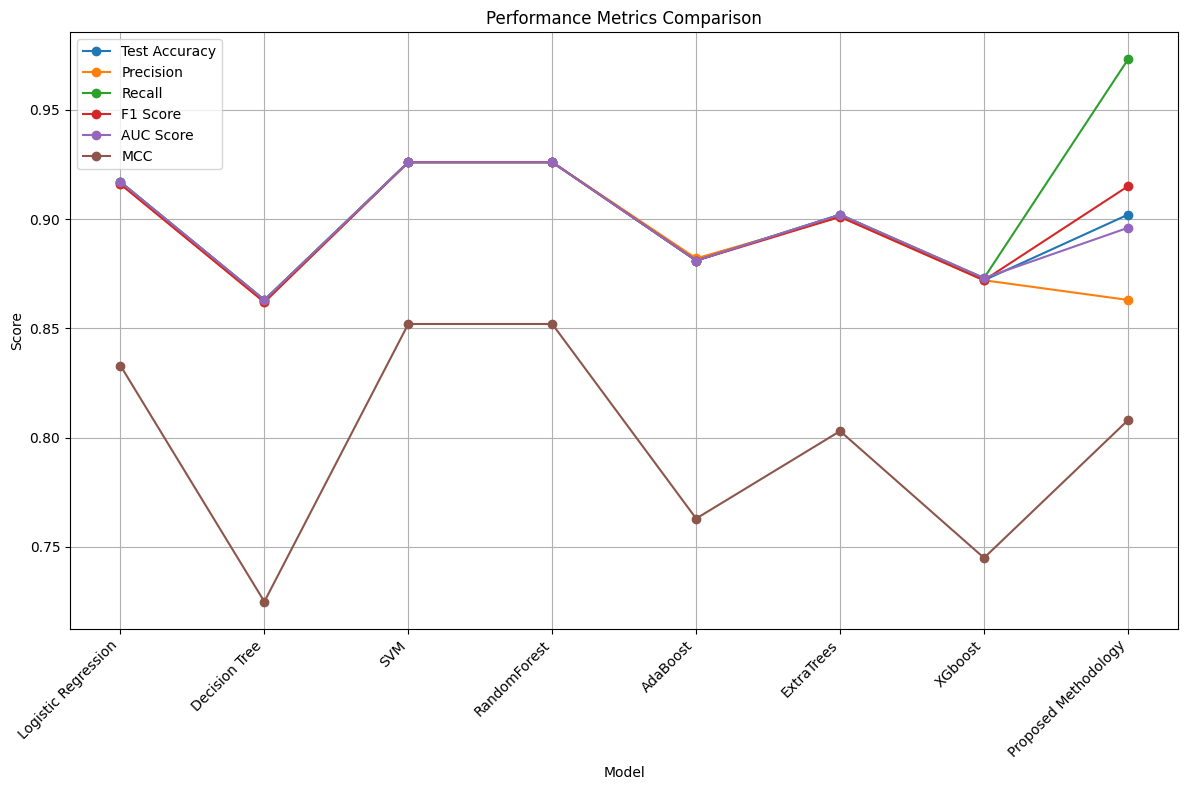

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM', 'RandomForest', 'AdaBoost', 'ExtraTrees', 'XGboost', 'Proposed Methodology'],
    'Test Accuracy': [0.917, 0.863, 0.926, 0.926, 0.881, 0.902, 0.872, 0.902],
    'Precision': [0.916, 0.862, 0.926, 0.926, 0.882, 0.901, 0.872, 0.863],
    'Recall': [0.917, 0.863, 0.926, 0.926, 0.881, 0.902, 0.873, 0.973],
    'F1 Score': [0.916, 0.862, 0.926, 0.926, 0.881, 0.901, 0.872, 0.915],
    'AUC Score': [0.917, 0.863, 0.926, 0.926, 0.881, 0.902, 0.873, 0.896],
    'MCC': [0.833, 0.725, 0.852, 0.852, 0.763, 0.803, 0.745, 0.808]
}

# Create a DataFrame
score_df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 8))

# Plot each metric for all models
for metric in ['Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score', 'MCC']:
    plt.plot(score_df['Model'], score_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


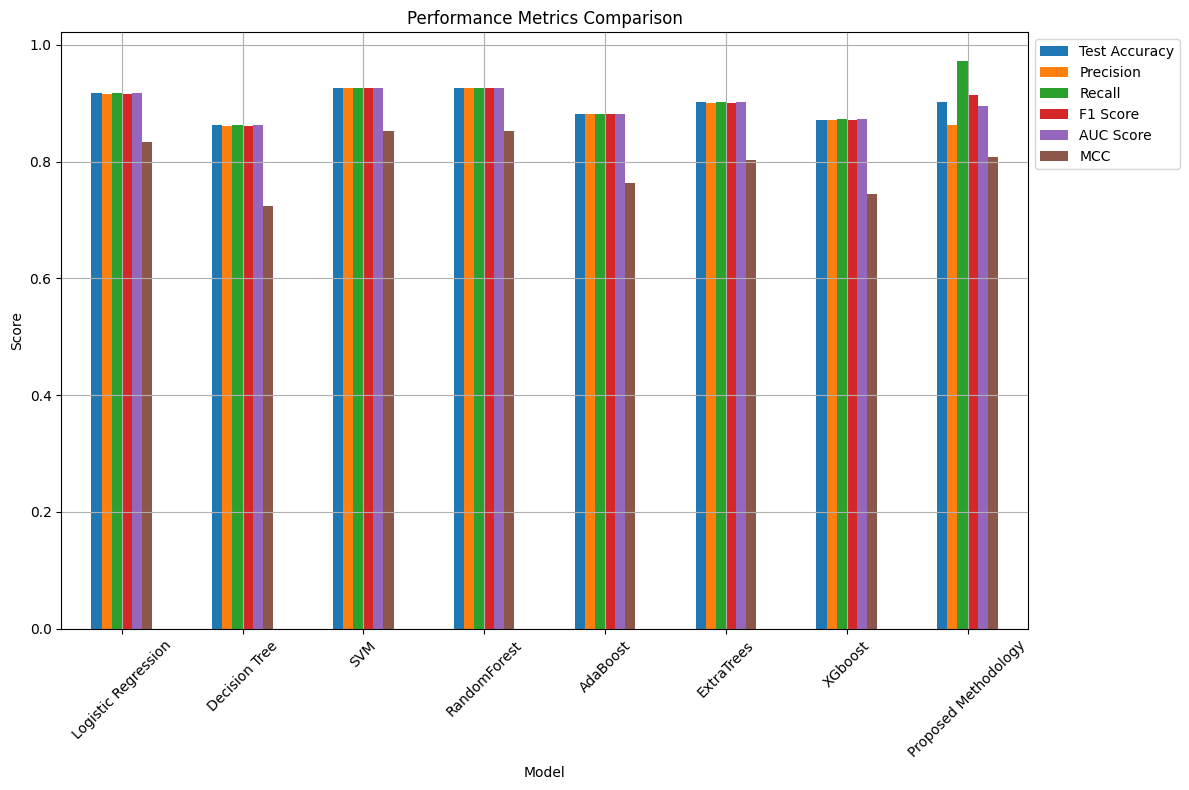

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM', 'RandomForest', 'AdaBoost', 'ExtraTrees', 'XGboost', 'Proposed Methodology'],
    'Test Accuracy': [0.917, 0.863, 0.926, 0.926, 0.881, 0.902, 0.872, 0.902],
    'Precision': [0.916, 0.862, 0.926, 0.926, 0.882, 0.901, 0.872, 0.863],
    'Recall': [0.917, 0.863, 0.926, 0.926, 0.881, 0.902, 0.873, 0.973],
    'F1 Score': [0.916, 0.862, 0.926, 0.926, 0.881, 0.901, 0.872, 0.915],
    'AUC Score': [0.917, 0.863, 0.926, 0.926, 0.881, 0.902, 0.873, 0.896],
    'MCC': [0.833, 0.725, 0.852, 0.852, 0.763, 0.803, 0.745, 0.808]
}

# Create a DataFrame
score_df = pd.DataFrame(data)

# Set the model names as index
score_df.set_index('Model', inplace=True)

# Plot
plt.figure(figsize=(12, 8))

# Plot each metric for all models as a bar plot
score_df.plot(kind='bar', rot=45, ax=plt.gca())
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import seaborn as sns

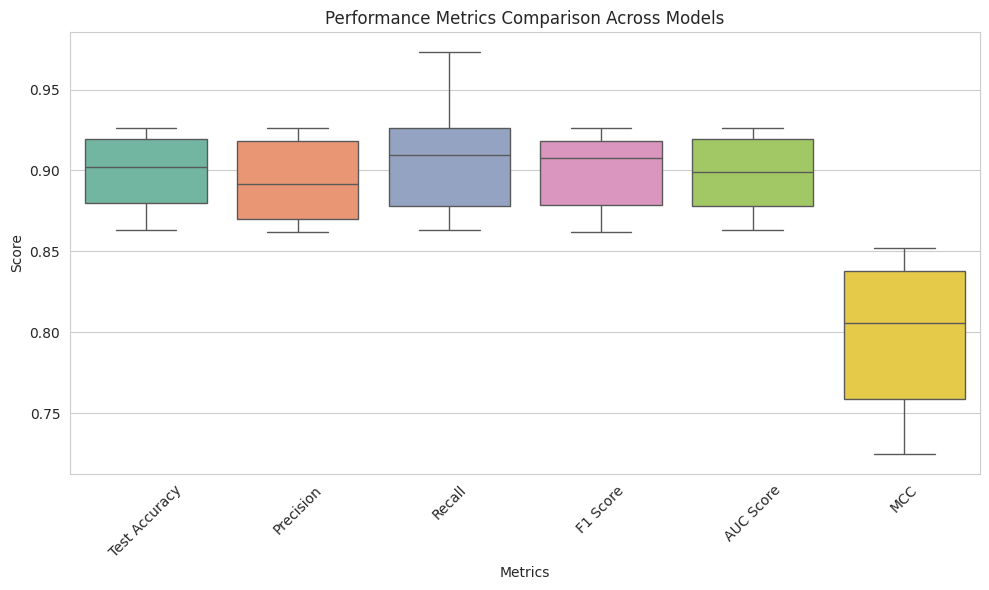

In [8]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM', 'RandomForest', 'AdaBoost', 'ExtraTrees', 'XGBoost', 'Proposed Methodology'],
    'Test Accuracy': [0.917, 0.863, 0.926, 0.926, 0.882, 0.902, 0.873, 0.902],
    'Precision': [0.916, 0.862, 0.926, 0.926, 0.882, 0.901, 0.872, 0.863],
    'Recall': [0.917, 0.863, 0.926, 0.926, 0.880, 0.902, 0.873, 0.973],
    'F1 Score': [0.916, 0.862, 0.926, 0.926, 0.881, 0.901, 0.872, 0.915],
    'AUC Score': [0.917, 0.863, 0.926, 0.926, 0.880, 0.902, 0.873, 0.896],
    'MCC': [0.833, 0.725, 0.852, 0.852, 0.763, 0.803, 0.745, 0.808]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns='Model'), palette="Set2")
plt.title('Performance Metrics Comparison Across Models')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()

SHAPELY VALUES

In [195]:
import shap

# SHAP expects model functions to take a 2D numpy array as input,
# so we define a wrapper function around the original Keras predict function

def prediction_wrapper(X):
  return model.predict([X[:,i] for i in range(X.shape[0])]).flatten()

In [196]:
background = X_train.iloc[np.random.choice(X_train.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(
    (model.layers[0].input, model.layers[-1].output), background
)
shap_values = explainer.shap_values(X_test[:].values)

# print the JS visualization code to the notebook

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [197]:
top_5_shap_values = shap_values[:5]

# Reshape the array to make it 2-dimensional
num_instances, num_features, _ = top_5_shap_values.shape
top_5_shap_values_2d = np.reshape(top_5_shap_values, (num_instances, num_features))

# Create a list of feature numbers (assuming feature numbers start from 1)
feature_numbers = list(range(1, num_features + 1))

# Create a DataFrame with SHAP values and feature numbers
top_5_df = pd.DataFrame(data=top_5_shap_values_2d, columns=feature_numbers)

# Round the values in the DataFrame to 3 decimal places
top_5_df = top_5_df.round(5)

# Print the DataFrame
print(top_5_df)

        1        2        3        4        5        6        7        8   \
0  0.00350  0.00236  0.04690  0.07015  0.00476  0.00932  0.01930 -0.00268   
1  0.00654  0.00578 -0.12043 -0.02240  0.01359  0.03768  0.08588 -0.01001   
2 -0.01296 -0.00605 -0.00948 -0.05122 -0.01531 -0.04629 -0.16779  0.00822   
3  0.00723  0.00040  0.17781 -0.01827  0.01896 -0.02518  0.06553 -0.01028   
4  0.00360 -0.00098  0.04719  0.06713  0.00742  0.02123  0.02040 -0.00250   

        9        10       11       12       13       14       15       16  \
0  0.00902  0.00666  0.03138  0.00317 -0.00630 -0.01781  0.03302  0.00228   
1 -0.05828  0.12388  0.18459  0.05045  0.27420 -0.03166 -0.00927 -0.07889   
2  0.01507 -0.09499  0.04632  0.00209 -0.05643 -0.01584  0.06420  0.02079   
3 -0.00736  0.07835  0.03368  0.03000 -0.03104  0.00890 -0.00940  0.00685   
4  0.00928  0.00761  0.03313  0.00362 -0.00625 -0.01794  0.03124  0.00223   

        17       18       19       20  
0 -0.00135 -0.00053  0.05423  0.07

In [198]:
absolute_shap_values = np.abs(shap_values)
average_abs_shap_values = np.mean(absolute_shap_values, axis=0)
feature_names = X_test.columns.tolist()

avg_shap_tuples = list(zip(feature_names, average_abs_shap_values))

# Create a DataFrame from the list of tuples
avg_shap_df = pd.DataFrame(avg_shap_tuples, columns=['Feature ', '       Average Absolute SHAP Value'])

# Print the DataFrame
print(avg_shap_df)

             Feature         Average Absolute SHAP Value
0                 Age               [0.0108081138863343]
1           RestingBP             [0.003454881859940456]
2         Cholesterol              [0.03778061930955585]
3           FastingBS              [0.05081283756257856]
4               MaxHR             [0.008782968232589419]
5             Oldpeak             [0.036485046217770094]
6               Sex_F              [0.06977414834801256]
7               Sex_M             [0.008934534727085525]
8   ChestPainType_ASY             [0.010469792897591269]
9   ChestPainType_ATA              [0.04806057694021399]
10  ChestPainType_NAP               [0.1104313659925543]
11   ChestPainType_TA              [0.01290918150835934]
12     RestingECG_LVH               [0.0599278172188007]
13  RestingECG_Normal             [0.013092280415920372]
14      RestingECG_ST              [0.02193916076116779]
15   ExerciseAngina_N             [0.029453245234782096]
16   ExerciseAngina_Y          

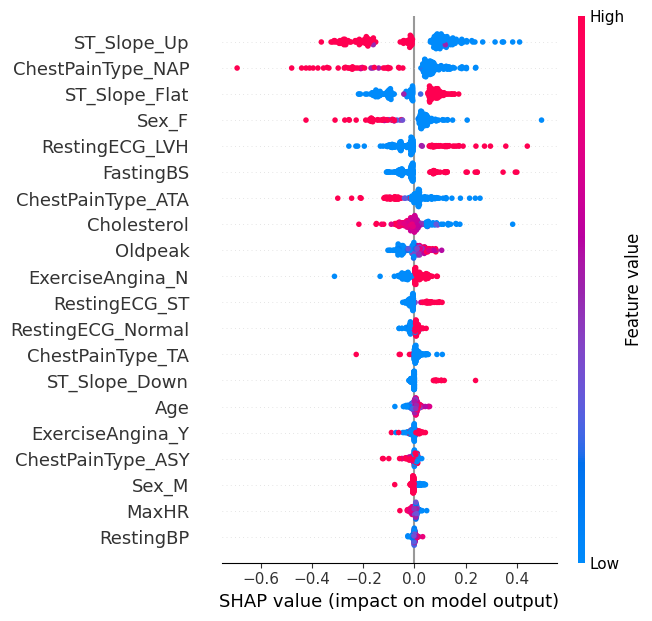

In [199]:
shap.summary_plot(shap_values.reshape(shap_values.shape[:-1]), features = X_test, show=False)
# Adjust the plot size
plt.gcf().set_size_inches(6, 6)  # Adjust width and height as needed

# Show the plot
plt.show()

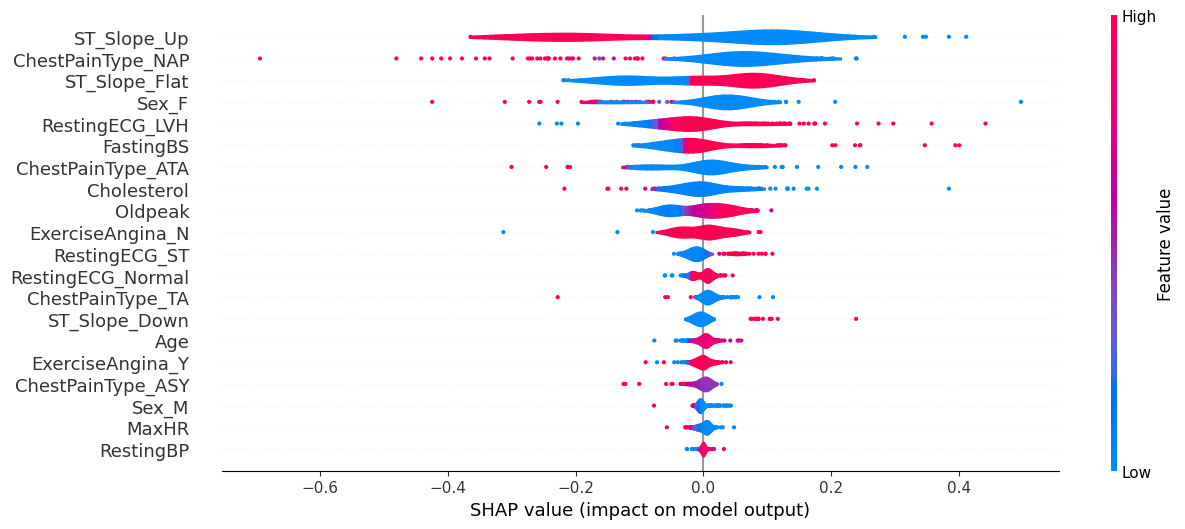

In [200]:
shap.summary_plot(shap_values.reshape(shap_values.shape[:-1]), features=X_test, plot_type='violin', show=False)

# Adjust the plot size
plt.gcf().set_size_inches(15, 5)  # Adjust width and height as needed

# Show the plot
plt.show()

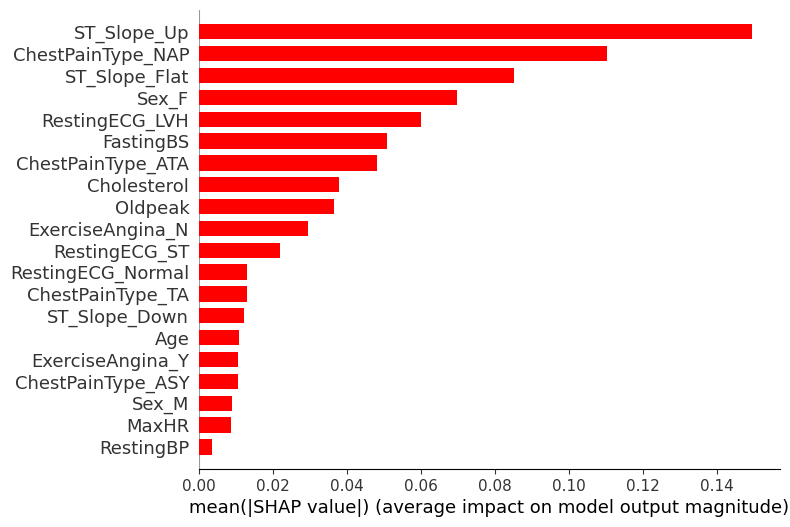

In [201]:
plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values.reshape(shap_values.shape[:-1]), features=X_test, plot_type='bar', color='red', show=False)
plt.gcf().set_size_inches(8, 5)  # Adjust plot size after it's generated
plt.show()

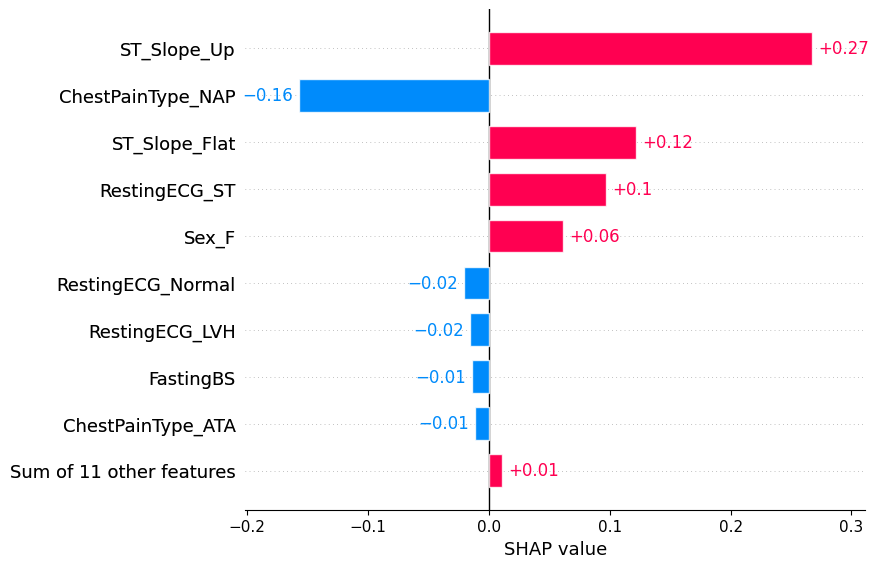

In [217]:
shap.plots.bar(shap.Explanation(shap_values.reshape(shap_values.shape[:-1])[90], feature_names=X_test.columns))